In [0]:
# regressao utilizando otimizador
# definindo as bibliotecas

import numpy as np # trabalhar com vetores e matrizes
import scipy # obter funcoes de treinamento
import matplotlib.pyplot as plt # biblioteca utilizada para construir os graficos
from scipy.optimize import curve_fit # importaco MSE

In [0]:
# definindo as variaveis

idade = [18, 25, 57, 45, 26, 64, 37, 40, 24, 33] # variavel independente
salarioAnual = [15000, 29000, 68000, 52000, 32000, 80000, 41000, 45000, 26000, 33000] # variavel dependente

xData = np.array(idade)
yData = np.array(salarioAnual) # listas tranformadas em array

In [0]:
# define a funcao a ser otimizada (regressao simples)

def equacaoLinear (x, a, b):
  return a * x + b

In [0]:
# gera os parametros iniciais para o otimizador

parametrosIniciais = np.array ([1.0, 1.0])

In [0]:
# realiza a otimizacao atraves do erro medio quadrado (MSE)

parametrosOtimizados, pcov = curve_fit(equacaoLinear, xData, yData, parametrosIniciais)

#parametrosOtimizados contem os parametros de ajuste da curva
#pcov contem a covariancia dos parametros encontrados

In [0]:
# realiza a previsao dos dados atraves do modelo encontrado (Regressao Linear)

previsaoModelo = equacaoLinear (xData, *parametrosOtimizados) #utiliza funcao linear com os parametros otimizados

In [0]:
# encontra o erro absoluto (linhas verticais)

erroAbsoluto = previsaoModelo - yData # valor previsto - valor real

In [25]:
# calcula o erro quadrado entre cada medida

SE = np.square(erroAbsoluto)
# calcula MSE

MSE = np.mean(SE)
print ('Se: ', SE)
print ('Mse: ', MSE)



Se:  [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
Mse:  5479238.909036714


In [26]:
# realiza calculo do coeficiente de determinacao 

Rsquared = 1.0  - (np.var(erroAbsoluto) / np.var(yData)) #numpy.var - encontra a variancia entre os dados do vetor
print ('Coeficiente de Determinacao: ', Rsquared)

Coeficiente de Determinacao:  0.9846300347582353


In [29]:
# mostra os parametros de regressao

print ('Y = {} X = {}' .format(parametrosOtimizados[0], parametrosOtimizados[1]))

Y = 1320.5325666669085 X = -6627.651716729711


Text(0, 0.5, 'Salario Anual (R$)')

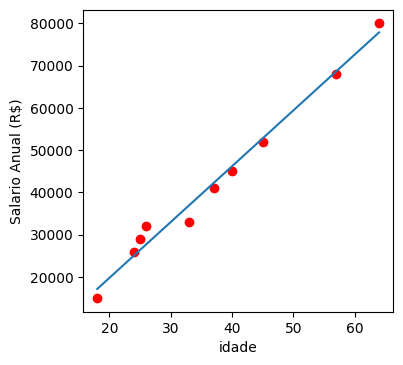

In [31]:
# realiza o plot da figura

f = plt.figure(figsize=(4, 4), dpi=100) #indica o tamanho da figura
axes = f.add_subplot(111) #cria os objetos para o subplot

# realiza o plot dos dados (pontos)

axes.plot (xData, yData, 'ro')

# cria os dados para serem utilizado na construcao da linha (equacao)

xModel = np.linspace(min(xData), max(xData)) #encontra valores maximos e minimos na linha
yModel = equacaoLinear(xModel, *parametrosOtimizados) #aplica a funcao com os parametros obtidos

# realiza o plot da linha

axes.plot(xModel, yModel)
plt.xlabel("idade")
plt.ylabel("Salario Anual (R$)")

In [0]:
# utiliza as funcoes do sklearn para construir a regressao linear

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
reg = LinearRegression () #objeto para regressao linear
x_ModeloSklearn = xData.reshape((-1, 1)) #na regressao linear e necessario que o X seja 2D
regressao = reg.fit (x_ModeloSklearn, yData) #realiza a regressa

In [0]:
previsao = reg.predict(x_ModeloSklearn)

In [0]:
MSE= mean_squared_error(yData,previsao) #encontra MSE atraves do SKLEARN 

In [38]:
# parametros encontrados

print ('Y = {} X = {}'.format(reg.coef_,reg.intercept_))

from sklearn.metrics import r2_score #metodo para o calculo do R2

R_2 = r2_score(yData, previsao) #realiza o caluclo do R2

print ('Coeficiente de Determinaco (R2): ', R_2)

Y = [1320.53256496] X = -6627.651646877624
Coeficiente de Determinaco (R2):  0.9846300347582353


In [0]:
# regressao utilizando um BD mais complexo

import pandas as pd

In [41]:
# funcao apenas utiliza para fazer upload de dados para o Google colab

from google.colab import files
uploades = files.upload()

In [40]:
# realiza a leitura dos dados

data = pd.read_csv("headbrain.csv")
data.head() #realiza a visao das 5 primeiras linhas do dataset

FileNotFoundError: ignored